## Assignment 7
Submitted by: **IEC2016012**   
Implement binary SVM to classify MNIST digits 3 and 8 using SMO Algorithm. Use different kernel functions(RBF, Polynomial at least) and generate ROC curve. Strictly divide(60:20:20) the data into train, validation and test splits. Perform all hyper parameter tuning/feature selection on validation data and report accuracy on test split. We suggest you to implement the SMO algorithm by yourself for which 10 bonus points will be given, but if you find it difficult, you are free to use third party implementation".

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Loading dataset

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
X = np.append(x_train,x_test,axis=0)
y = np.append(y_train,y_test,axis=0)

## Separating images of 3 and 8

In [5]:
mask = np.logical_or(y==3, y==8)
mask.shape

(70000,)

In [6]:
X = X[mask]
y = y[mask]

In [7]:
X = np.reshape(X, (X.shape[0],-1))

## Dividing dataset into train, validation, test

In [8]:
mask_tr = np.random.rand(len(X))<0.6
mask_val = np.logical_and(0.6<=np.random.rand(len(X)), np.random.rand(len(X))<0.8)
mask_te = 0.8<=np.random.rand(len(X))

In [9]:
X_train = X[mask_tr]
y_train = y[mask_tr]
X_val = X[mask_val]
y_val = y[mask_val]
X_test = X[mask_te]
y_test = y[mask_te]

In [10]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(8311, 784) (4449, 784) (2775, 784)
(8311,) (4449,) (2775,)


## Visualization

3


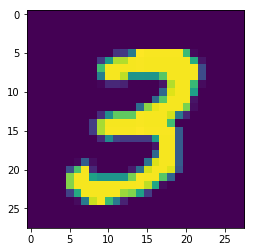

In [11]:
plt.imshow(np.reshape(X_train[0],(28,28)))
print(y_train[0])
plt.show()

## Analysis

In [12]:
np.array(np.unique(y, return_counts=True)).T

array([[   3, 7141],
       [   8, 6825]])

In [13]:
# y[y==3] = -1
# y[y==8] = 1
# y.tolist()
y = np.where(y==3, -1, y) 
y = np.where(y==8, 1, y) 

## SVM

In [14]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

### Linear kernel

In [15]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_train, y_train) 
pred = linear_svc.predict(X_test)
print(accuracy_score(y_test, pred))

0.9765765765765766


### RBF kernel

In [16]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train) 
pred = rbf_svc.predict(X_test)
print(accuracy_score(y_test, pred))

/home/subtleseeker/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.969009009009009


### Polynomial kernel

In [17]:
poly_svc = svm.SVC(kernel='poly')
poly_svc.fit(X_train, y_train) 
pred = poly_svc.predict(X_test)
print(accuracy_score(y_test, pred))

/home/subtleseeker/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.827027027027027


### Sigmoid kernel

In [18]:
sigmoid_svc = svm.SVC(kernel='sigmoid')
sigmoid_svc.fit(X_train, y_train) 
pred = sigmoid_svc.predict(X_test)
print(accuracy_score(y_test, pred))

/home/subtleseeker/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.961081081081081
